In [4]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![Crisp_DM](../reports\figures\Crisp_DM.png)

#   Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

In [5]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [6]:
pd_raw=pd.read_csv(data_path)

In [7]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8555,8581,8581,8581,8581,8590,8590,8625,8625,8625
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9313453,9313453,9341492,9341492,9341492,9341492,9341492,9341492,9341492,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423044,423044,423044,423104,423104,423104,423104,423104,423104,423104
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,145457,146264,147096,147942,148996,150123,151113,152199,153012,153939


In [128]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [129]:
time_idx = pd_raw.columns[4:]

In [130]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [131]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [132]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [133]:
country_list=['Italy',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [134]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

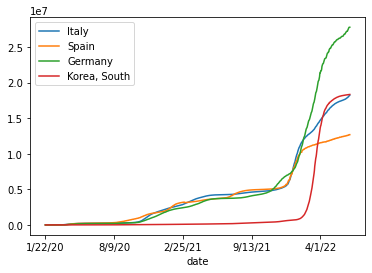

In [135]:
%matplotlib inline
df_plot.set_index('date').plot()

In [136]:
df_plot

,date,Italy,Spain,Germany,"Korea, South"
0,1/22/20,0,0,0,1
1,1/23/20,0,0,0,1
2,1/24/20,0,0,0,2
3,1/25/20,0,0,0,2
4,1/26/20,0,0,0,3
...,...,...,...,...,...
882,6/22/22,18014202,12613634,27573585,18305783
883,6/23/22,18071634,12613634,27681775,18312993
884,6/24/22,18128044,12681820,27771111,18319773
885,6/25/22,18184917,12681820,27771112,18326019


# Data Type Date

In [137]:
df_plot.head()

,date,Italy,Spain,Germany,"Korea, South"
0,1/22/20,0,0,0,1
1,1/23/20,0,0,0,1
2,1/24/20,0,0,0,2
3,1/25/20,0,0,0,2
4,1/26/20,0,0,0,3


In [138]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 

In [139]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
df_plot.head()

,date,Italy,Spain,Germany,"Korea, South"
0,2020-01-22,0,0,0,1
1,2020-01-23,0,0,0,1
2,2020-01-24,0,0,0,2
3,2020-01-25,0,0,0,2
4,2020-01-26,0,0,0,3


In [141]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';', index=False)

# Relational data model - defining a primary key

A primary key’s main features are:

It must contain a unique value for each row of data.
It cannot contain null values.

In [142]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [143]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})

In [144]:
pd_data_base = pd_data_base.drop(['Lat','Long'],axis = 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,0,0,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [145]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [146]:
pd_data_base.set_index(['state','country']).T

state           NaN                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   
...             ...     ...     ...     ...    ...        ...   
6/22/22      181912  277940  266006   43774  99761         11   
6/23/22      181987  278211  266015   43774  99761         11   
6/24/22      182033  278504  266025   43774  99761         11   
6/25/22      182072  278793  266030   43774  99761         11   
6/26/22      182149  279077  266038   43774  99761         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
6/22/22                8590   9341492  423104                       150123   
6/23/22                8590   9341492  423104                       151113   
6/24/22                8625   9341492  423104                       152199   
6/25/22                8625   9341492  423104                       153012   
6/26/22                8625   9367172  423104                       153939   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
6/22/22  ...  951948     239895   11026    525105  10739855   
6/23/22  ...  951948     239993   11033    525340  10740595   
6/24/22  ...  951948     240087   11044    525539  10742234   
6/25/22  ...  951948     240206   11044    525716  10742891   
6/26/22  ...  951948     240345   11173    525782  10743448   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
6/22/22             658503                  535  11824  324558   255049  
6/23/22             658503                  535  11824  324922   255136  
6/24/22             658503                  535  11824  325110   255309  
6/25/22             658503                  535  11824  325110   255309  
6/26/22             658503                  535  11824  325110   255355  

[887 rows x 285 columns]

In [147]:
test_pd = pd_data_base.set_index(['state','country']).T
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [148]:
test_pd.stack(level= [0,1])

         state              country    
1/22/20  NaN                Afghanistan         0.0
                            Albania             0.0
                            Algeria             0.0
                            Andorra             0.0
                            Angola              0.0
                                             ...   
6/26/22  Western Australia  Australia      887743.0
         Xinjiang           China            1008.0
         Yukon              Canada           4453.0
         Yunnan             China            2174.0
         Zhejiang           China            3154.0
Length: 252795, dtype: float64

In [149]:
pd_relational_model = test_pd.stack(level= [0,1]).reset_index().rename(columns = {'level_0' : 'date',0 :'confirmed'})

In [150]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [151]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [152]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [153]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [154]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')